<a href="https://colab.research.google.com/github/Tecindes/ChallengeONE__/blob/main/TelecomX_parte2_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación de los datos

## Extracción del archivo tratado

In [493]:
import pandas as pd
# URL raw del archivo CSV (ajusta con tu repo y path)
url_csv = 'https://raw.githubusercontent.com/Tecindes/ChallengeONE__/refs/heads/main/reporte.csv'


# Cargar el CSV directamente como DataFrame
df = pd.read_csv(url_csv)

# Vista previa
df.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,SeniorLabel,ChurnLabel
4816,6772-WFQRD,No,Male,0,No,Yes,40,Yes,No,No,...,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),20.40,854.90,No,0
3588,5087-SUURX,Yes,Female,0,Yes,No,18,No,No phone service,DSL,...,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,No,1
4383,6177-PEVRA,No,Female,0,No,No,48,Yes,No,DSL,...,No,No,No,Two year,No,Credit card (automatic),55.50,2627.35,No,0
2357,3374-PZLXD,No,Male,0,No,No,34,Yes,No,No,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,675.60,No,0
5112,7184-LRUUR,No,Female,0,No,No,22,Yes,No,DSL,...,No,Yes,No,One year,No,Bank transfer (automatic),65.25,1441.80,No,0


## Eliminación de columnas irrelevantes

In [494]:
df.columns


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'SeniorLabel',
       'ChurnLabel'],
      dtype='object')

In [495]:
df.drop(['customerID','customer.SeniorCitizen','ChurnLabel'], axis=1, inplace=True)


In [496]:
df.rename({'SeniorLabel':'customer.SeniorCitizen'}, axis=1, inplace=True)


## Encoding

### Clasificación de variables

In [497]:
def clasificar_variable(col):
    if pd.api.types.is_numeric_dtype(col):
        return 'Cuantitativa continua' if col.nunique() > 10 else 'Cuantitativa discreta'
    elif col.nunique() == 2:
        return 'Cualitativa binaria'
    elif pd.api.types.is_object_dtype(col):
        return 'Cualitativa nominal u ordinal'
    else:
        return 'Tipo desconocido'

def generar_reporte(df, nombre_archivo='reporte_variables.md'):
    with open(nombre_archivo, 'w', encoding='utf-8') as f:
        f.write(f'# Clasificación de Variables\n\n')
        for col in df.columns:
            tipo = clasificar_variable(df[col])
            f.write(f"- **{col}**: {tipo}\n")

In [498]:
clasificacion = df.apply(clasificar_variable)
clasificacion

,0
Churn,Cualitativa binaria
customer.gender,Cualitativa binaria
customer.Partner,Cualitativa binaria
customer.Dependents,Cualitativa binaria
customer.tenure,Cuantitativa continua
phone.PhoneService,Cualitativa binaria
phone.MultipleLines,Cualitativa nominal u ordinal
internet.InternetService,Cualitativa nominal u ordinal
internet.OnlineSecurity,Cualitativa nominal u ordinal
internet.OnlineBackup,Cualitativa nominal u ordinal


In [499]:
def clasificar_simple_variable(col):
    if pd.api.types.is_numeric_dtype(col):
        return 'Cuantitativa'
    elif col.nunique() == 2:
        return 'Cualitativa'
    elif pd.api.types.is_object_dtype(col):
        return 'Cualitativa'
    else:
        return 'Desconocido'

In [500]:
Cualitativa=[]
Cuantitativa=[]


for col in df.columns:
    tipo = clasificar_simple_variable(df[col])
    if tipo == 'Cuantitativa':
        Cuantitativa.append(col)
    elif tipo == 'Cualitativa':
        Cualitativa.append(col)

print(Cualitativa)
print(Cuantitativa)


['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'customer.SeniorCitizen']
['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']


### Tabla de frecuencia para las variables cualitativas

In [501]:

for col in Cualitativa:
  print(f'Columna :{col}, Dato : {sorted(df[col].unique())}'	)

Columna :Churn, Dato : ['No', 'Yes']
Columna :customer.gender, Dato : ['Female', 'Male']
Columna :customer.Partner, Dato : ['No', 'Yes']
Columna :customer.Dependents, Dato : ['No', 'Yes']
Columna :phone.PhoneService, Dato : ['No', 'Yes']
Columna :phone.MultipleLines, Dato : ['No', 'No phone service', 'Yes']
Columna :internet.InternetService, Dato : ['DSL', 'Fiber optic', 'No']
Columna :internet.OnlineSecurity, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.OnlineBackup, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.DeviceProtection, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.TechSupport, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.StreamingTV, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.StreamingMovies, Dato : ['No', 'No internet service', 'Yes']
Columna :account.Contract, Dato : ['Month-to-month', 'One year', 'Two year']
Columna :account.PaperlessBilling, Dato : ['No', 'Yes']
Columna :account.Payment

In [502]:
dis_frec_cualitativa_dict = {}
for col in Cualitativa:
    frecuencia = df[col].value_counts()
    porcentaje = df[col].value_counts(normalize=True).round(4) * 100
    dis_frec_cualitativa_dict[col] = pd.DataFrame({
        'Frecuencia': frecuencia,
        'Porcentaje %': porcentaje
    })


In [503]:
for col in Cualitativa:
 print(f'{dis_frec_cualitativa_dict[col]} \n')


       Frecuencia  Porcentaje %
Churn                          
No           5174         73.46
Yes          1869         26.54 

                 Frecuencia  Porcentaje %
customer.gender                          
Male                   3555         50.48
Female                 3488         49.52 

                  Frecuencia  Porcentaje %
customer.Partner                          
No                      3641          51.7
Yes                     3402          48.3 

                     Frecuencia  Porcentaje %
customer.Dependents                          
No                         4933         70.04
Yes                        2110         29.96 

                    Frecuencia  Porcentaje %
phone.PhoneService                          
Yes                       6361         90.32
No                         682          9.68 

                     Frecuencia  Porcentaje %
phone.MultipleLines                          
No                         3390         48.13
Yes                 

In [504]:
dis_frec_cualitativa_Churn_dict = {}
for col in Cualitativa:
    Cross = pd.crosstab(df['Churn'],df[col],aggfunc='mean', values=df['account.Charges.Total'])
    dis_frec_cualitativa_Churn_dict[col] = Cross # Store the crosstab DataFrame directly

In [505]:
for col in Cualitativa:
 print(f'Media del account.Charges.Total:\n {dis_frec_cualitativa_Churn_dict[col]} \n')

Media del account.Charges.Total:
 Churn           No          Yes
Churn                          
No     2549.911442          NaN
Yes            NaN  1531.796094 

Media del account.Charges.Total:
 customer.gender       Female         Male
Churn                                    
No               2588.966046  2511.987562
Yes              1440.979499  1623.491559 

Media del account.Charges.Total:
 customer.Partner           No          Yes
Churn                                     
No                1827.486542  3195.150805
Yes               1088.980292  2326.084529 

Media del account.Charges.Total:
 customer.Dependents           No          Yes
Churn                                        
No                   2516.262478  2613.852018
Yes                  1465.871646  1843.825000 

Media del account.Charges.Total:
 phone.PhoneService           No          Yes
Churn                                       
No                  1764.628906  2636.154397
Yes                  687.087941  16

### Tabla de frecuencias para las variables cuantitativas

In [506]:
for col in Cuantitativa:
  print(f'Columna: {col}, Unicos: {df[col].unique()}'	)
  print(f'Columna: {col}, Valores:{df[col].value_counts()}\n')

Columna: customer.tenure, Unicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
Columna: customer.tenure, Valores:customer.tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Columna: account.Charges.Monthly, Unicos: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Columna: account.Charges.Monthly, Valores:account.Charges.Monthly
20.05     61
19.85     45
19.95     44
19.90     44
19.70     43
          ..
113.45     1
117.50     1
116.15     1
62.55      1
116.20     1
Name: count, Length: 1585, dtype: int64

Columna: account.Charges.Total, Unicos: [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
Columna: account.Charges.Total, Valores:account.Charges.Total
20.20      11
0.00       11
19.75       9
19.90      

In [507]:
for col in Cuantitativa:
  print(f'Columna: {col}, Mínimo: {df[col].min()}'	)
  print(f'Columna: {col}, Máximo: {df[col].max()}')

Columna: customer.tenure, Mínimo: 0
Columna: customer.tenure, Máximo: 72
Columna: account.Charges.Monthly, Mínimo: 18.25
Columna: account.Charges.Monthly, Máximo: 118.75
Columna: account.Charges.Total, Mínimo: 0.0
Columna: account.Charges.Total, Máximo: 8684.8


In [508]:
import math
import numpy as np
n=df.shape[0]                  # Número total de datos individuales
k=round(1+(10/3)*np.log10(n))  # Regla de Sturges
dis_frec_cuantitativa_dict_sturges={}
for col in Cuantitativa:
  frec = pd.value_counts(pd.cut(x=df[col],
                                       bins=k,
                                       include_lowest=True))
  porc = pd.value_counts(pd.cut(x=df[col],
                                       bins=k,
                                       include_lowest=True),normalize=True).round(4) * 100
  dis_frec_cuantitativa_dict_sturges[col] = pd.DataFrame({
        'Frecuencia': frec,
        'Porcentaje %': porc
    })



/tmp/ipython-input-3752633385.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frec = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-3752633385.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porc = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-3752633385.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frec = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-3752633385.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porc = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-3752633385.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value

In [509]:
dis_frec_cuantitativa_dict_sturges['customer.tenure'].sort_index(ascending=False)

,Frecuencia,Porcentaje %
customer.tenure,,
"(66.857, 72.0]",944,13.40
"(61.714, 66.857]",387,5.49
"(56.571, 61.714]",344,4.88
"(51.429, 56.571]",362,5.14
"(46.286, 51.429]",334,4.74
"(41.143, 46.286]",316,4.49
"(36.0, 41.143]",314,4.46
"(30.857, 36.0]",401,5.69
"(25.714, 30.857]",352,5.00


In [510]:
dis_frec_cuantitativa_dict_sturges

{'customer.tenure':                   Frecuencia  Porcentaje %
 customer.tenure                           
 (-0.073, 5.143]         1371         19.47
 (66.857, 72.0]           944         13.40
 (5.143, 10.286]          599          8.50
 (10.286, 15.429]         500          7.10
 (20.571, 25.714]         411          5.84
 (15.429, 20.571]         408          5.79
 (30.857, 36.0]           401          5.69
 (61.714, 66.857]         387          5.49
 (51.429, 56.571]         362          5.14
 (25.714, 30.857]         352          5.00
 (56.571, 61.714]         344          4.88
 (46.286, 51.429]         334          4.74
 (41.143, 46.286]         316          4.49
 (36.0, 41.143]           314          4.46,
 'account.Charges.Monthly':                               Frecuencia  Porcentaje %
 account.Charges.Monthly                               
 (18.148999999999997, 25.429]        1511         21.45
 (68.5, 75.679]                       748         10.62
 (82.857, 90.036]        

### Histogramas

In [511]:
import seaborn as sns

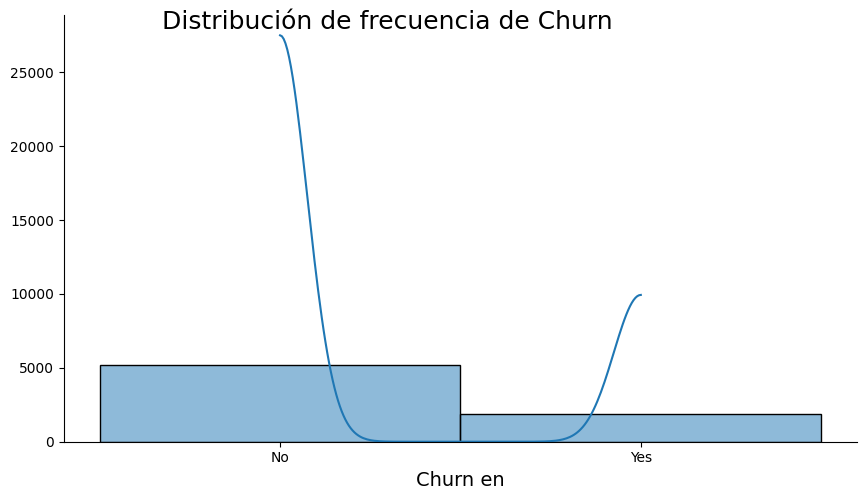

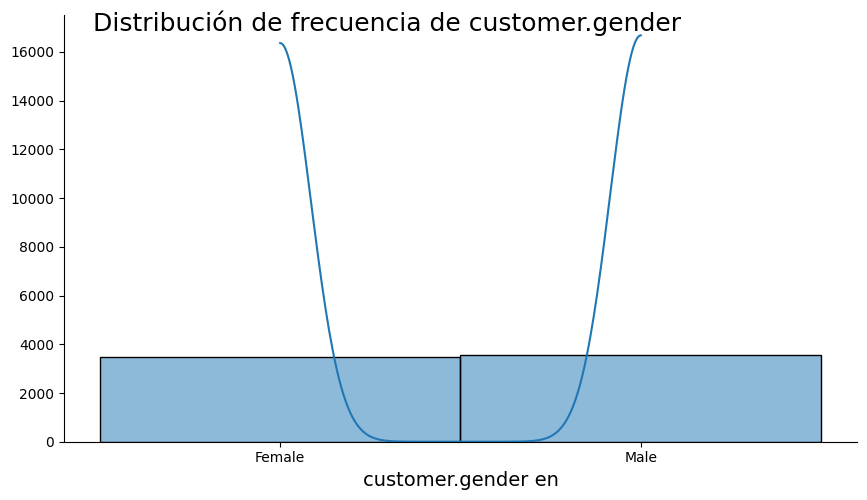

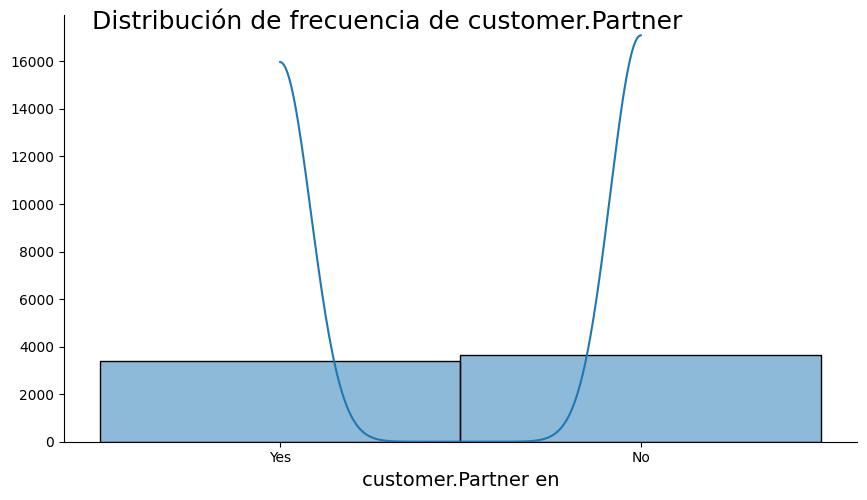

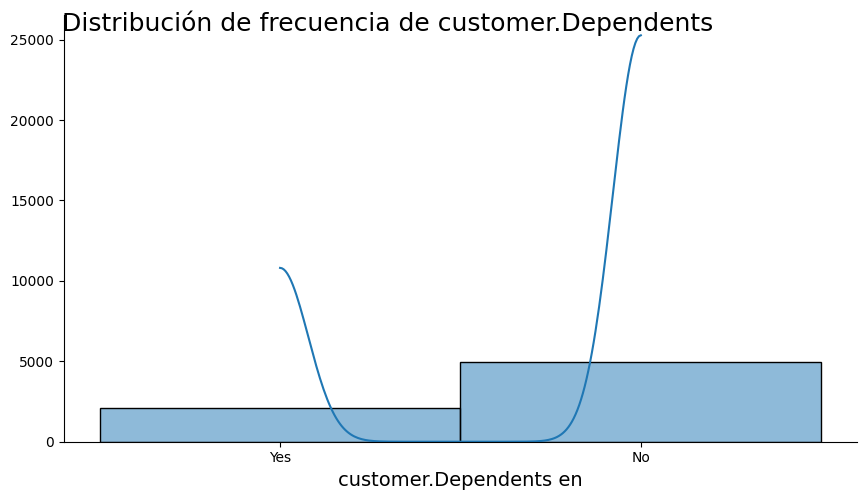

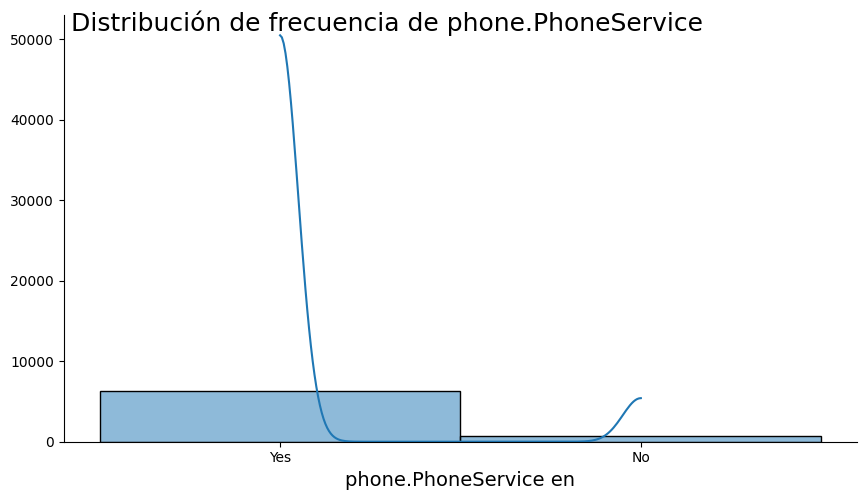

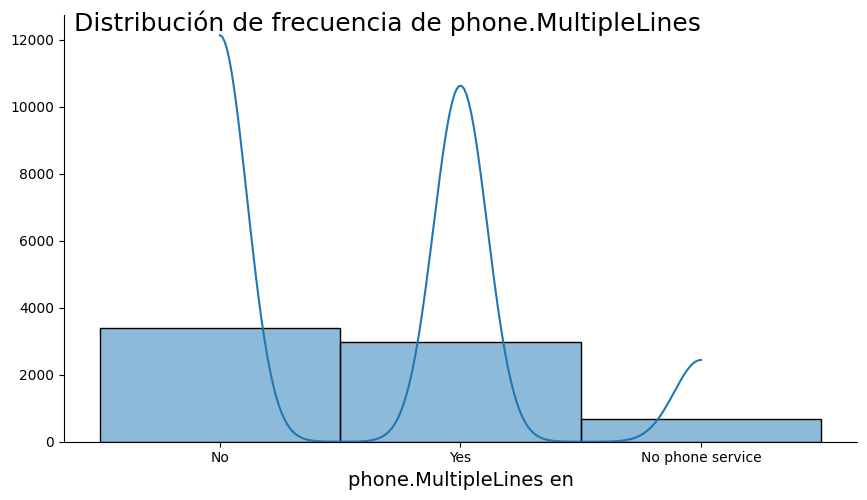

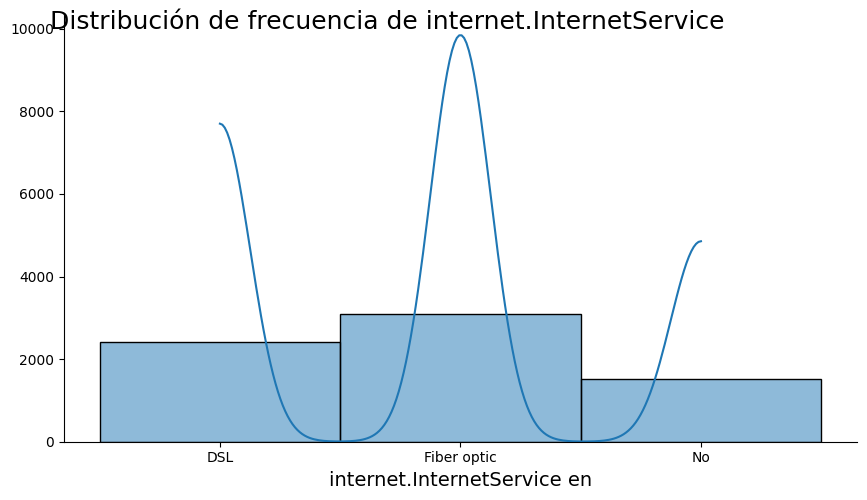

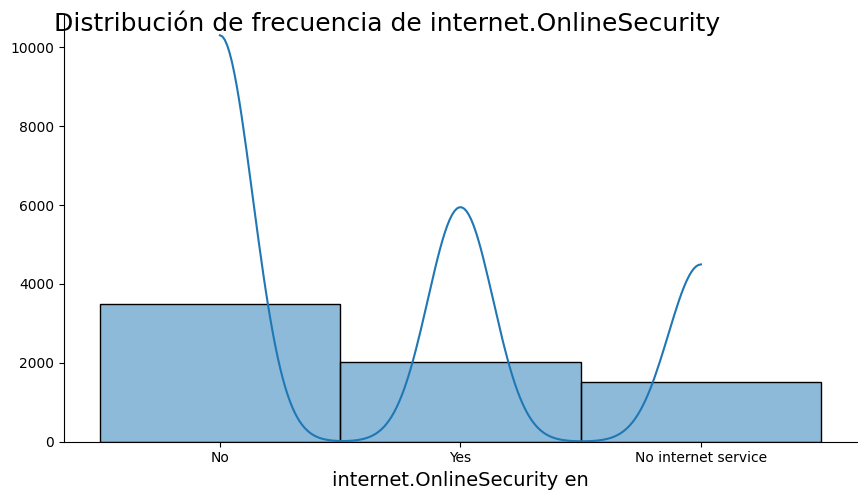

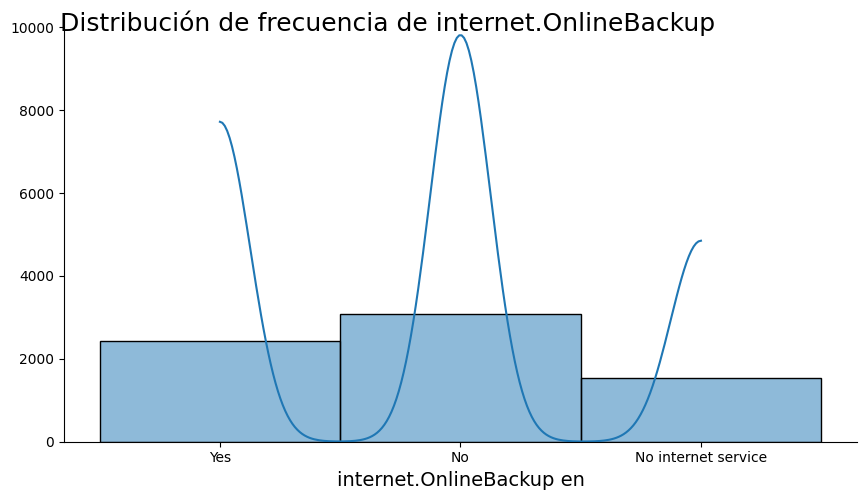

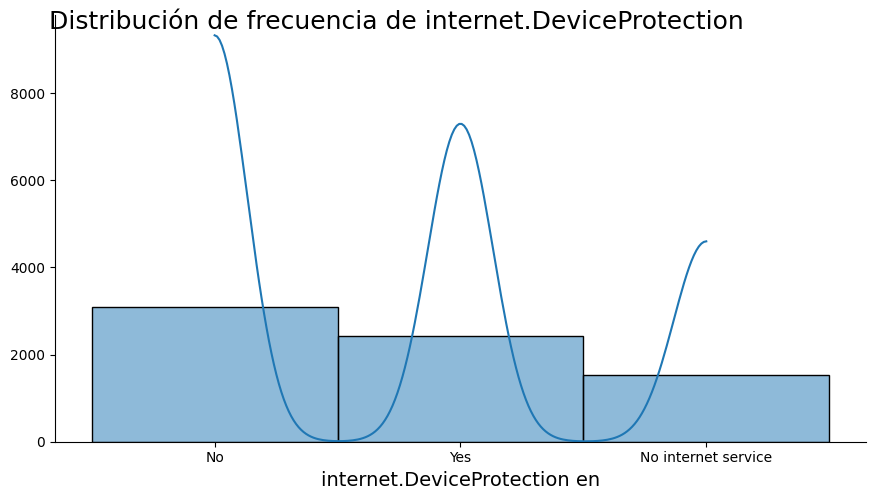

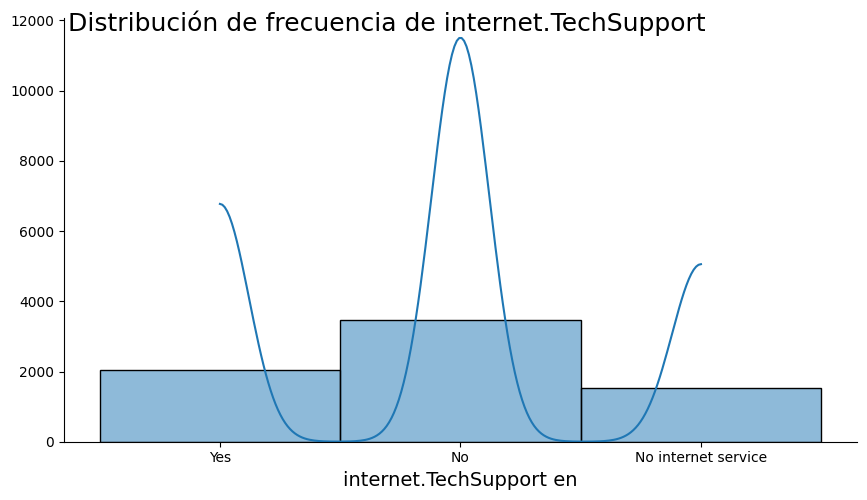

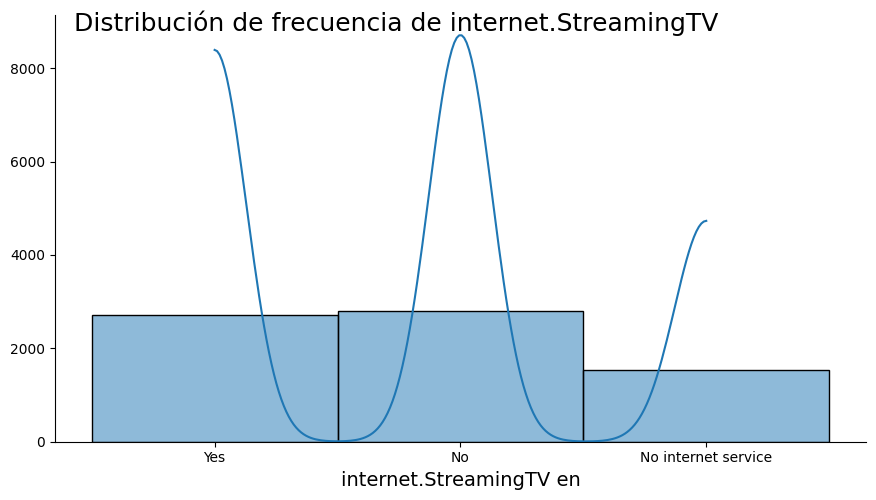

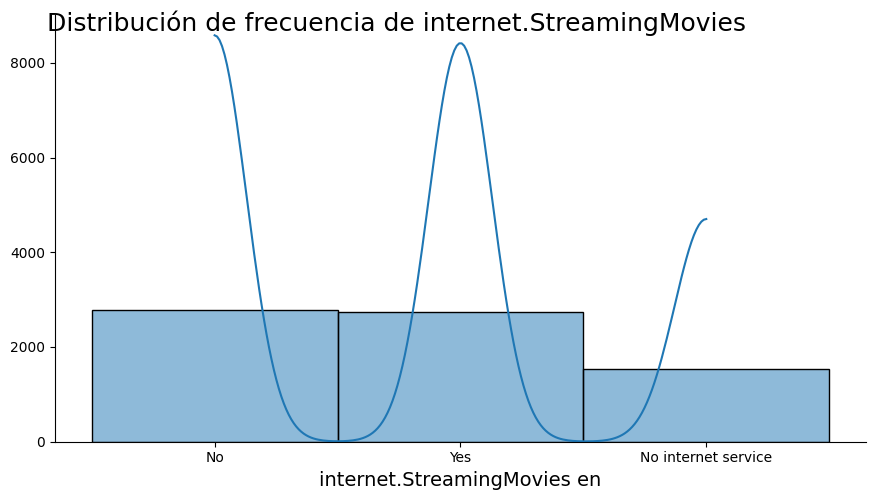

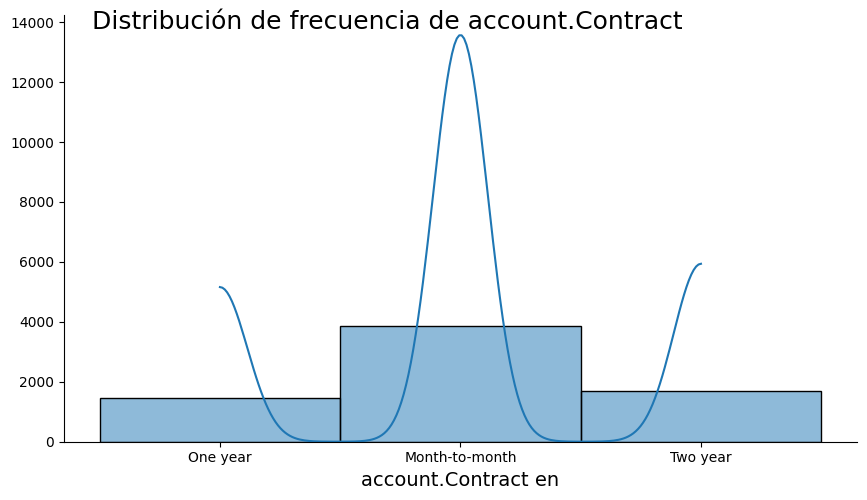

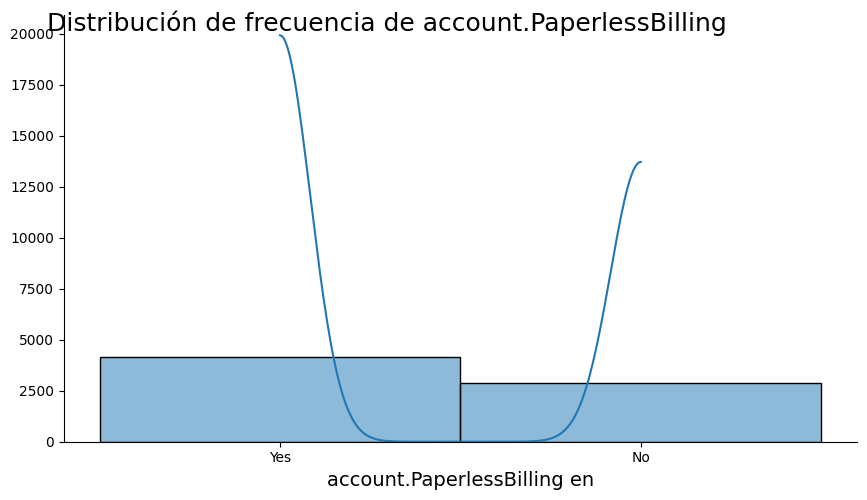

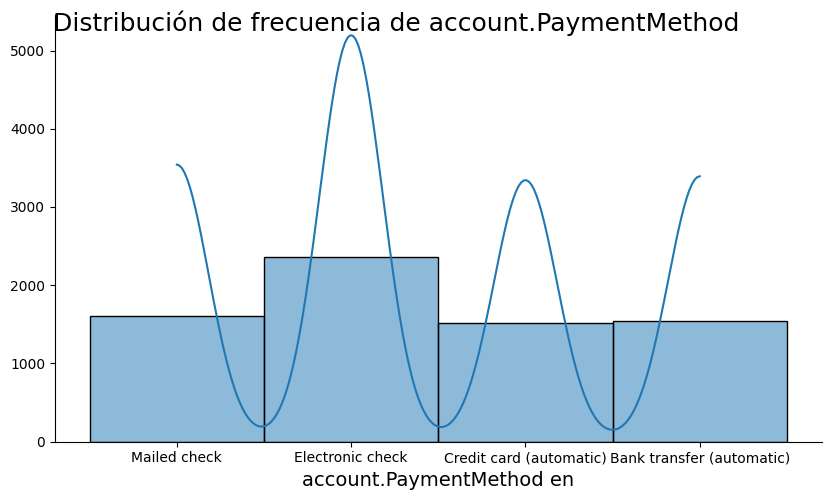

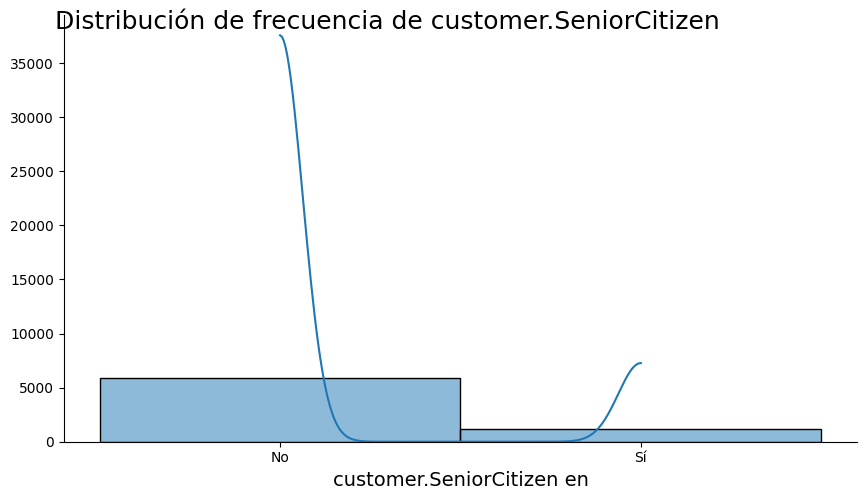

In [512]:
for col in Cualitativa:
 ax = sns.displot(data=df, x=col, kde=True)
 ax.fig.set_size_inches(10,5)
 ax.fig.suptitle(f'Distribución de frecuencia de {col}', fontsize=18)
 ax.set_xlabels(f'{col} en', fontsize=14)
 ax.set_ylabels(f'', fontsize=14)
 ax
 print(f'\n')


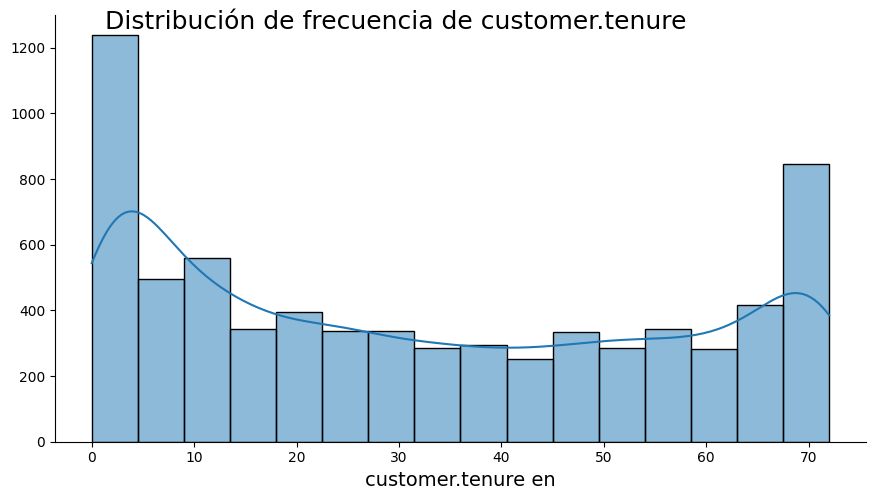

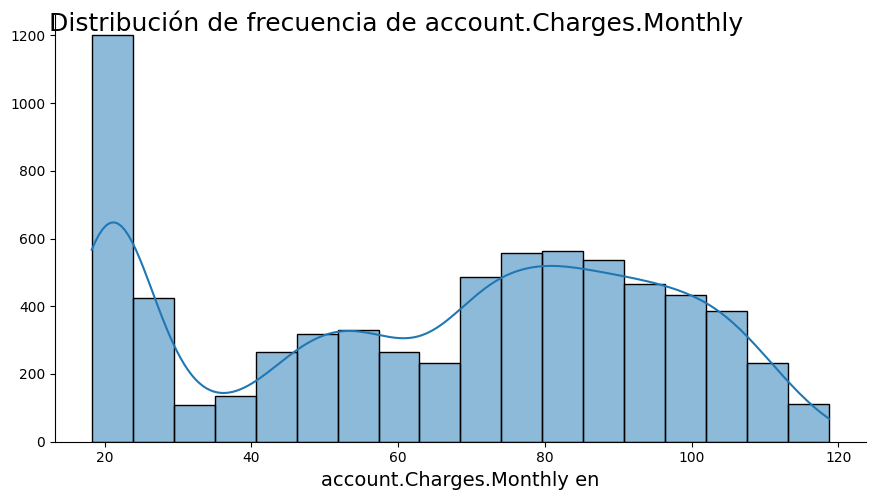

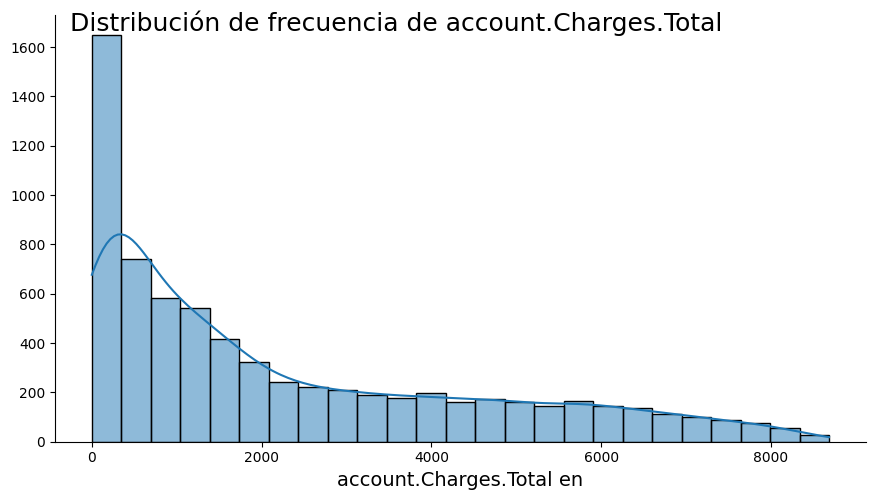

In [513]:
for col in Cuantitativa:
 ax = sns.displot(data=df, x=col, kde=True)
 ax.fig.set_size_inches(10,5)
 ax.fig.suptitle(f'Distribución de frecuencia de {col}', fontsize=18)
 ax.set_xlabels(f'{col} en', fontsize=14)
 ax.set_ylabels(f'', fontsize=14)
 ax
 print(f'\n')

### Medidas de tendencia central

In [514]:
for col_cl in Cualitativa:
  for col_ct in Cuantitativa:
    print(f'Promedio de {col_cl} contra {col_ct}\n {df.groupby([col_cl])[col_ct].mean()}\n\n')

Promedio de Churn contra customer.tenure
 Churn
No     37.569965
Yes    17.979133
Name: customer.tenure, dtype: float64


Promedio de Churn contra account.Charges.Monthly
 Churn
No     61.265124
Yes    74.441332
Name: account.Charges.Monthly, dtype: float64


Promedio de Churn contra account.Charges.Total
 Churn
No     2549.911442
Yes    1531.796094
Name: account.Charges.Total, dtype: float64


Promedio de customer.gender contra customer.tenure
 customer.gender
Female    32.244553
Male      32.495359
Name: customer.tenure, dtype: float64


Promedio de customer.gender contra account.Charges.Monthly
 customer.gender
Female    65.204243
Male      64.327482
Name: account.Charges.Monthly, dtype: float64


Promedio de customer.gender contra account.Charges.Total
 customer.gender
Female    2279.918062
Male      2279.554008
Name: account.Charges.Total, dtype: float64


Promedio de customer.Partner contra customer.tenure
 customer.Partner
No     23.357869
Yes    42.017637
Name: customer.tenure,

### one-hot encoding

In [515]:
exclude_columns = ['Churn']
columns_to_encode = [col for col in Cualitativa if col not in exclude_columns]
columns_to_encode

['customer.gender',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'customer.SeniorCitizen']

In [516]:
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [517]:
df_encoded.sample(3)

,Churn,customer.tenure,account.Charges.Monthly,account.Charges.Total,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,...,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,customer.SeniorCitizen_Sí
1737,Yes,17,76.45,1233.40,True,True,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
2048,Yes,17,80.85,1400.85,True,True,True,True,False,False,...,True,False,False,False,False,False,False,True,False,False
3890,No,68,38.90,2719.20,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False


## Verificación de la proporción de cancelacion (Churn)

In [518]:
dis_frec_cualitativa_dict['Churn']

,Frecuencia,Porcentaje %
Churn,,
No,5174,73.46
Yes,1869,26.54


## Balanceo de clases

In [519]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [520]:
df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})
df_encoded['Churn']

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7038,0
7039,1
7040,0
7041,0


In [521]:
# Separar variables dependiente e independientes
X = df_encoded.drop('Churn', axis=1)  # Variables predictoras
y = df_encoded['Churn']               # Variable objetivo

In [522]:
# Dividir en entrenamiento y prueba
# Usamos stratify=y para mantener la proporción de clases.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [523]:
# Crear el modelo con clases balanceadas
# El parámetro class_weight='balanced' ajusta automáticamente el peso de cada clase inversamente proporcional a su frecuencia.
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model

RandomForestClassifier(class_weight='balanced', random_state=42)

In [524]:
# Entrenar el modelo
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [525]:
# Hacer predicciones
y_pred = model.predict(X_test)


In [526]:
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))



[[1395  157]
 [ 292  269]]


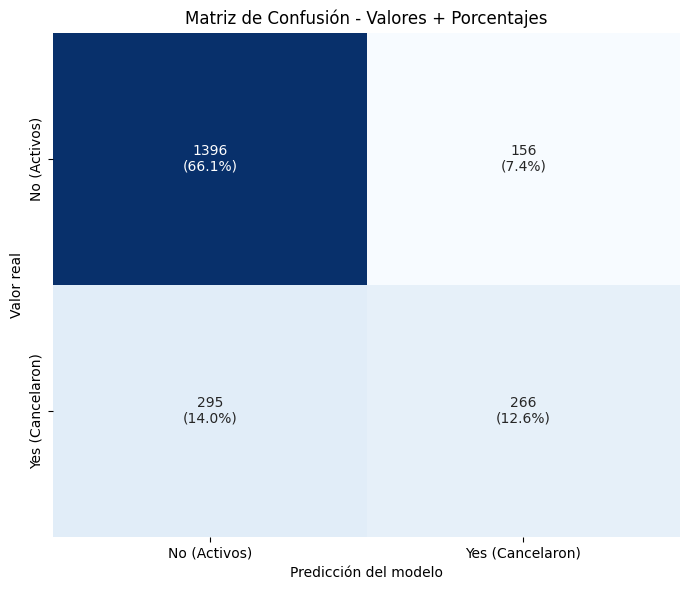

In [527]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matriz de confusión (valores absolutos)
conf_matrix = np.array([[1396, 156],
                        [295, 266]])

# Etiquetas
labels = ['No (Activos)', 'Yes (Cancelaron)']

# Calcular porcentajes sobre el total
total = conf_matrix.sum()
percent_matrix = (conf_matrix / total) * 100

# Crear etiquetas combinadas (valor absoluto + porcentaje)
annot = np.empty_like(conf_matrix).astype(str)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        count = conf_matrix[i, j]
        perc = percent_matrix[i, j]
        annot[i, j] = f'{count}\n({perc:.1f}%)'

# Graficar
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=annot, fmt='', cmap='Blues',
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.title('Matriz de Confusión - Valores + Porcentajes')
plt.xlabel('Predicción del modelo')
plt.ylabel('Valor real')
plt.tight_layout()
plt.show()


In [528]:
# Evaluar el modelo
print(classification_report(y_test, y_pred, target_names=['No (Activos)', 'Yes (Cancelaron)']))


                  precision    recall  f1-score   support

    No (Activos)       0.83      0.90      0.86      1552
Yes (Cancelaron)       0.63      0.48      0.55       561

        accuracy                           0.79      2113
       macro avg       0.73      0.69      0.70      2113
    weighted avg       0.78      0.79      0.78      2113



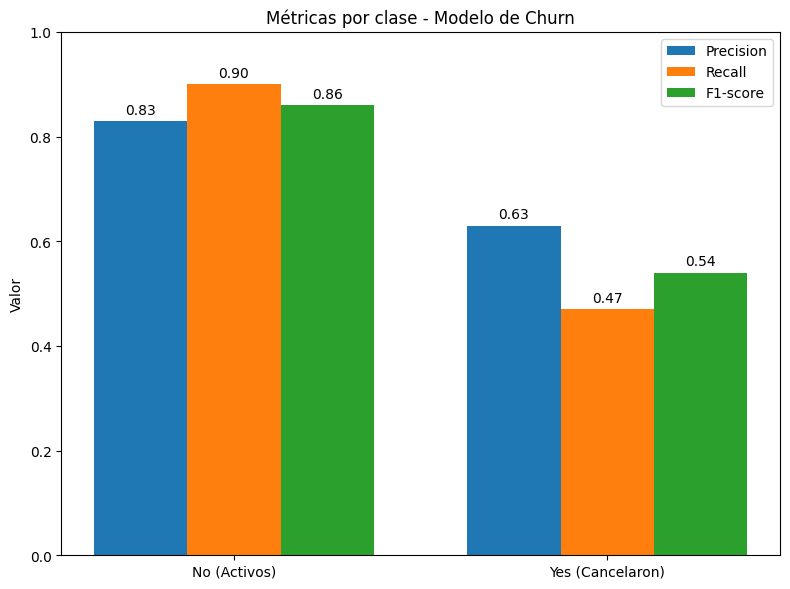

In [529]:
import matplotlib.pyplot as plt
import numpy as np

# 🔢 Paso 1: Datos de métricas por clase (del classification_report)
labels = ['No (Activos)', 'Yes (Cancelaron)']
precision = [0.83, 0.63]
recall = [0.90, 0.47]
f1_score = [0.86, 0.54]

# 🧱 Paso 2: Configurar posiciones y ancho de barra
x = np.arange(len(labels))
width = 0.25

# 🎨 Paso 3: Crear gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - width, precision, width, label='Precision')
bars2 = ax.bar(x, recall, width, label='Recall')
bars3 = ax.bar(x + width, f1_score, width, label='F1-score')

# 🏷️ Paso 4: Etiquetas, título, leyenda
ax.set_ylabel('Valor')
ax.set_title('Métricas por clase - Modelo de Churn')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend()

# 🖊️ Paso 5: Añadir etiquetas con valores numéricos
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Pruebas

In [530]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   account.Charges.Monthly                        7043 non-null   float64
 3   account.Charges.Total                          7043 non-null   float64
 4   customer.gender_Male                           7043 non-null   bool   
 5   customer.Partner_Yes                           7043 non-null   bool   
 6   customer.Dependents_Yes                        7043 non-null   bool   
 7   phone.PhoneService_Yes                         7043 non-null   bool   
 8   phone.MultipleLines_No phone service           7043 non-null   bool   
 9   phone.MultipleLines_Yes                        7043 

In [531]:
# Usamos el método de Pearson (también puedes probar Spearman si hay no linealidad)
correlaciones = df_encoded.corr(method='pearson')

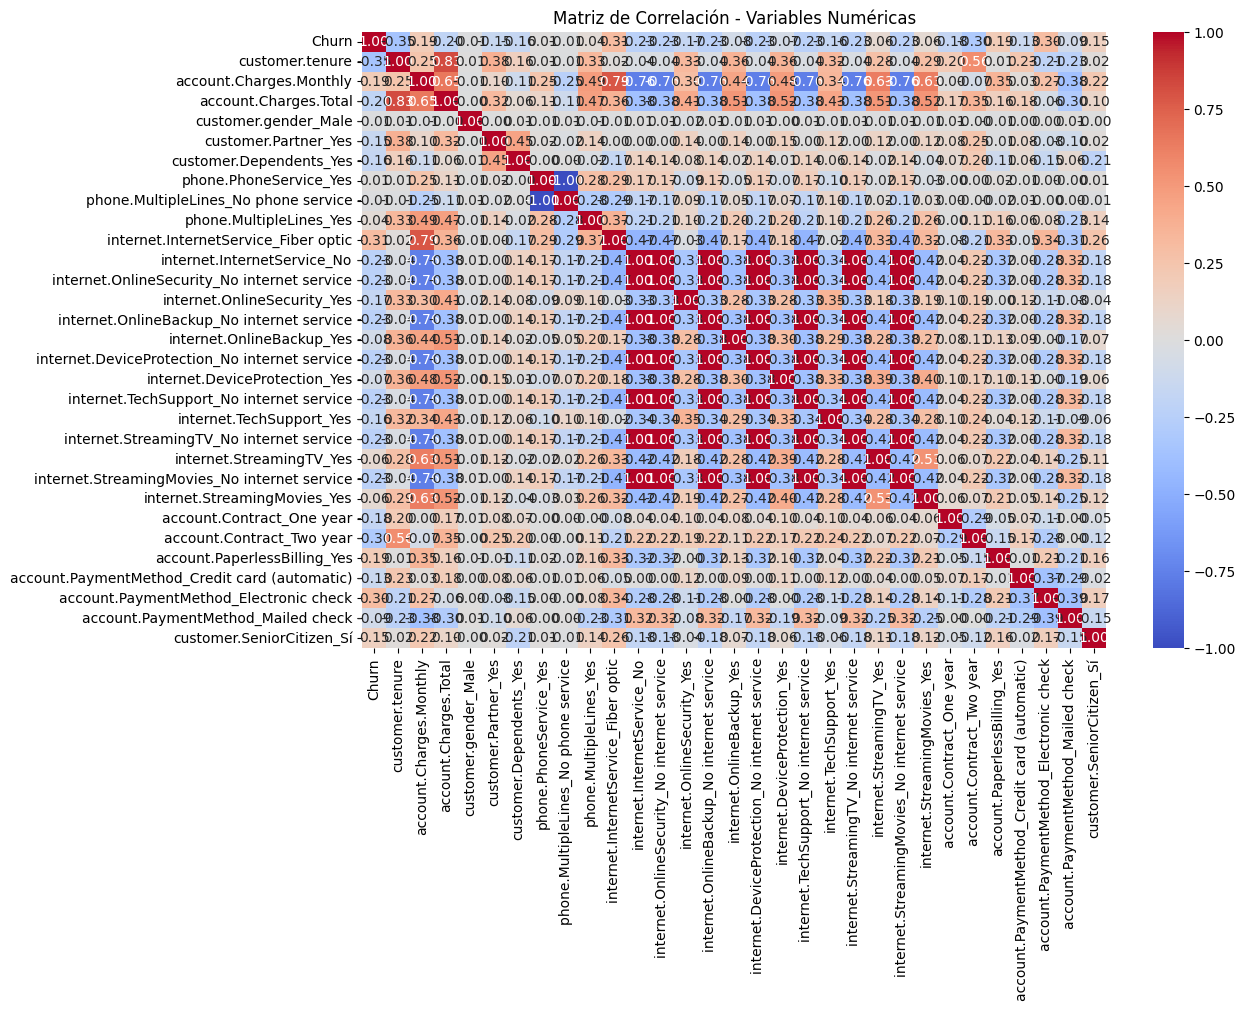

In [532]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()

In [533]:
# Extraemos las correlaciones con la variable 'cancelado'
correlaciones_Churn= correlaciones['Churn'].drop('Churn')
correlaciones_ordenadas = correlaciones_Churn.abs().sort_values(ascending=False)

# Mostramos el top variables más correlacionadas
print("🔎 Variables más correlacionadas con la cancelación:")
print(correlaciones_ordenadas.head(10))

🔎 Variables más correlacionadas con la cancelación:
customer.tenure                                  0.352229
internet.InternetService_Fiber optic             0.308020
account.Contract_Two year                        0.302253
account.PaymentMethod_Electronic check           0.301919
internet.InternetService_No                      0.227890
internet.OnlineSecurity_No internet service      0.227890
internet.TechSupport_No internet service         0.227890
internet.DeviceProtection_No internet service    0.227890
internet.StreamingTV_No internet service         0.227890
internet.StreamingMovies_No internet service     0.227890
Name: Churn, dtype: float64


In [568]:
correlaciones_ordenadas.head(10).index

Index(['customer.tenure', 'internet.InternetService_Fiber optic',
       'account.Contract_Two year', 'account.PaymentMethod_Electronic check',
       'internet.InternetService_No',
       'internet.OnlineSecurity_No internet service',
       'internet.TechSupport_No internet service',
       'internet.DeviceProtection_No internet service',
       'internet.StreamingTV_No internet service',
       'internet.StreamingMovies_No internet service'],
      dtype='object')

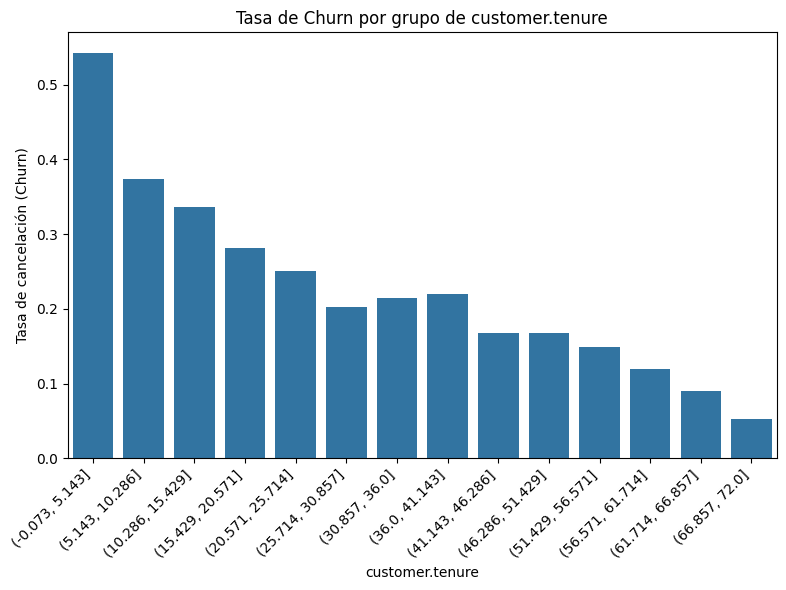

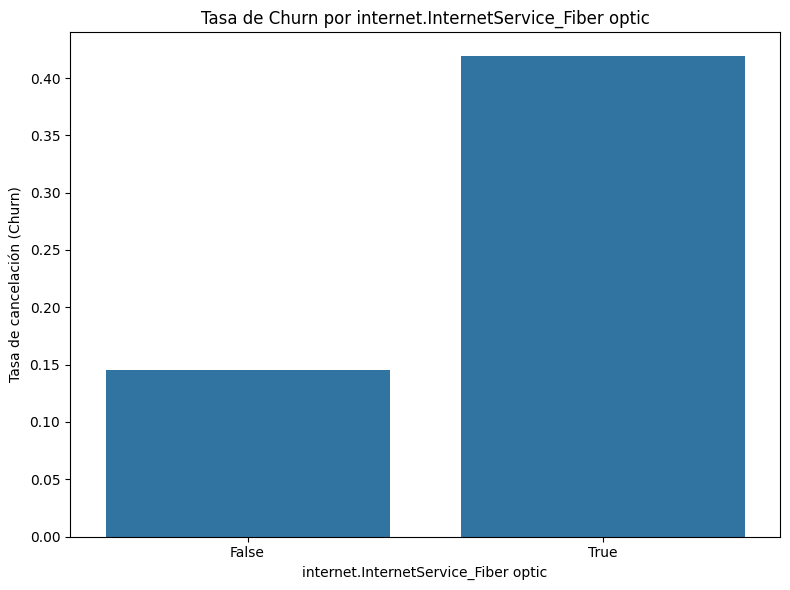

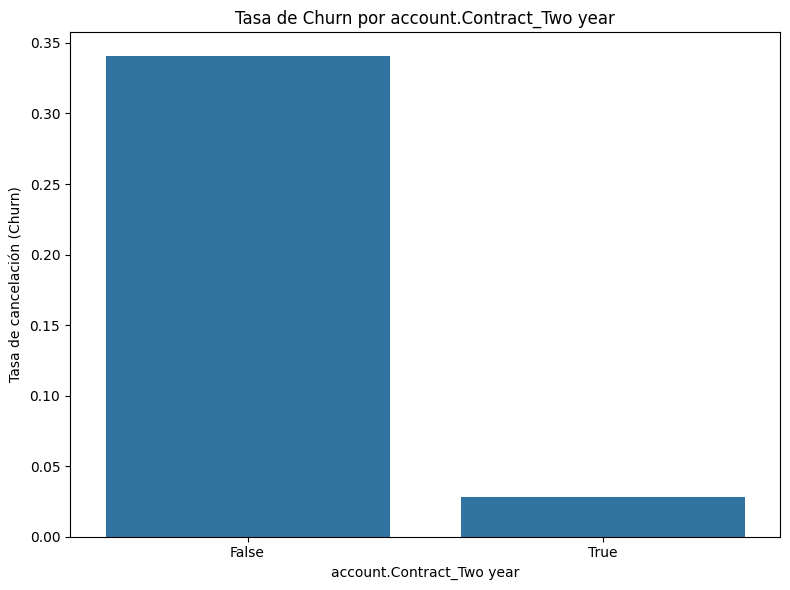

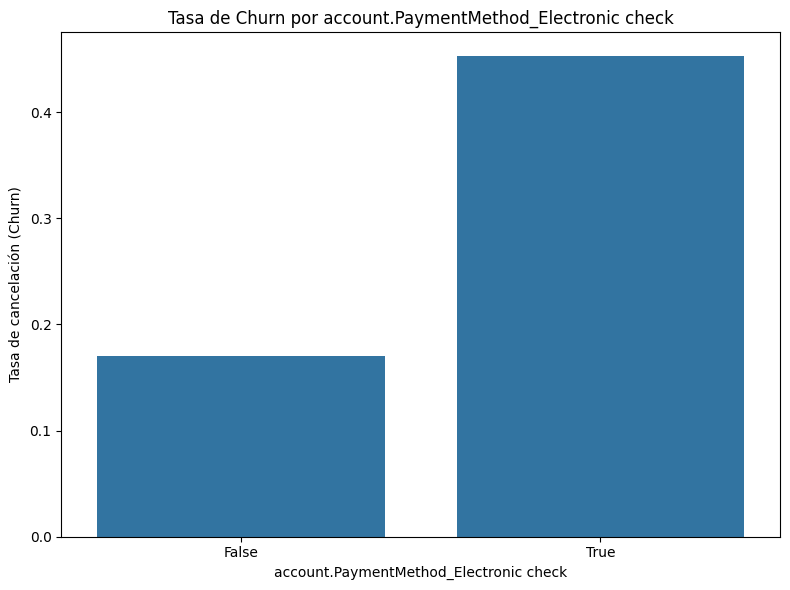

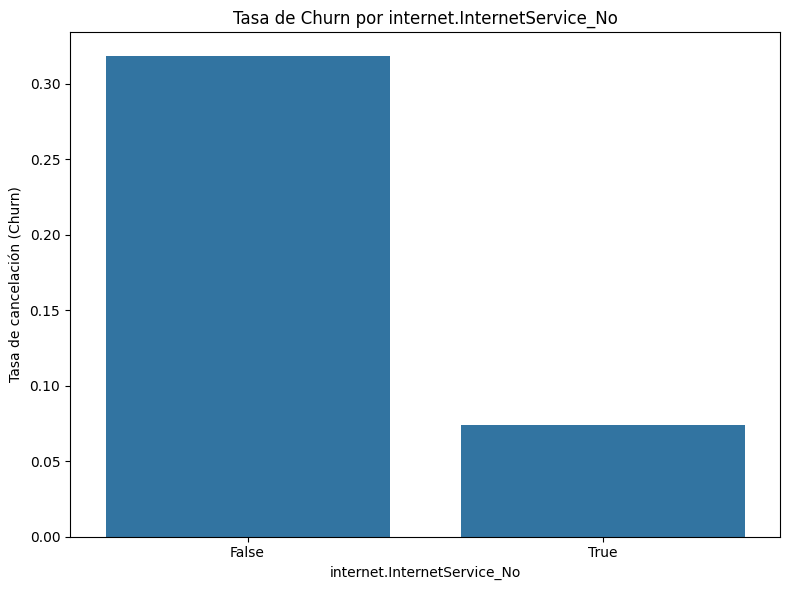

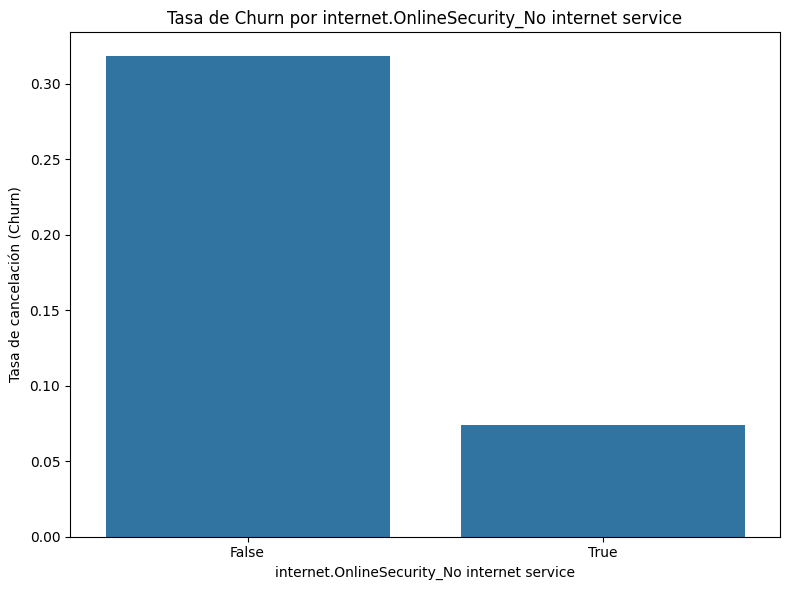

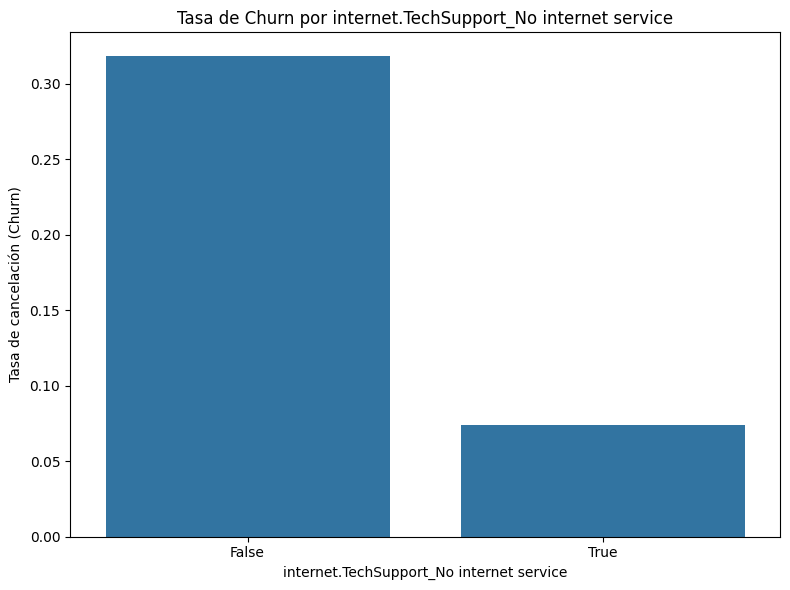

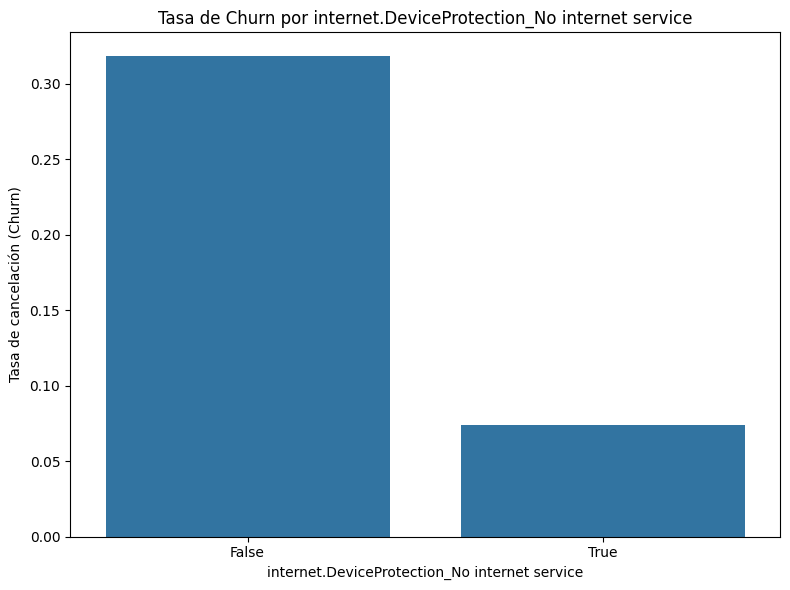

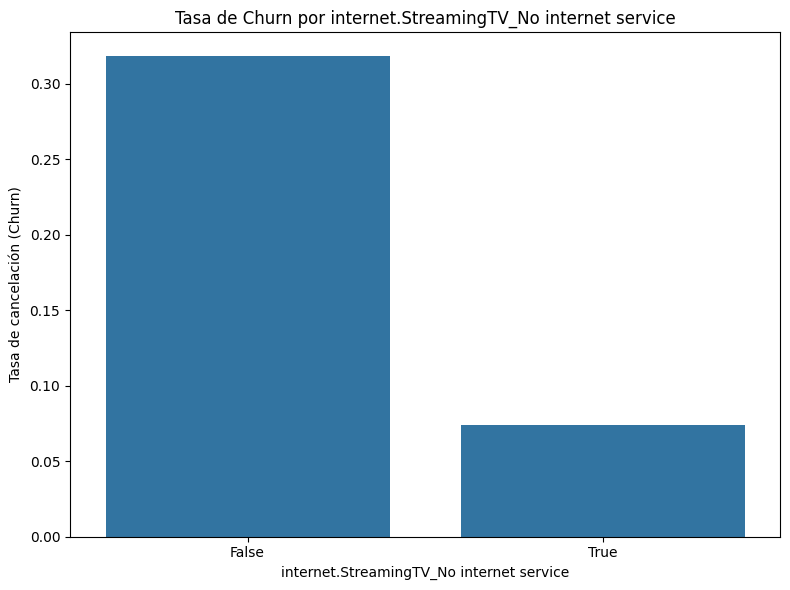

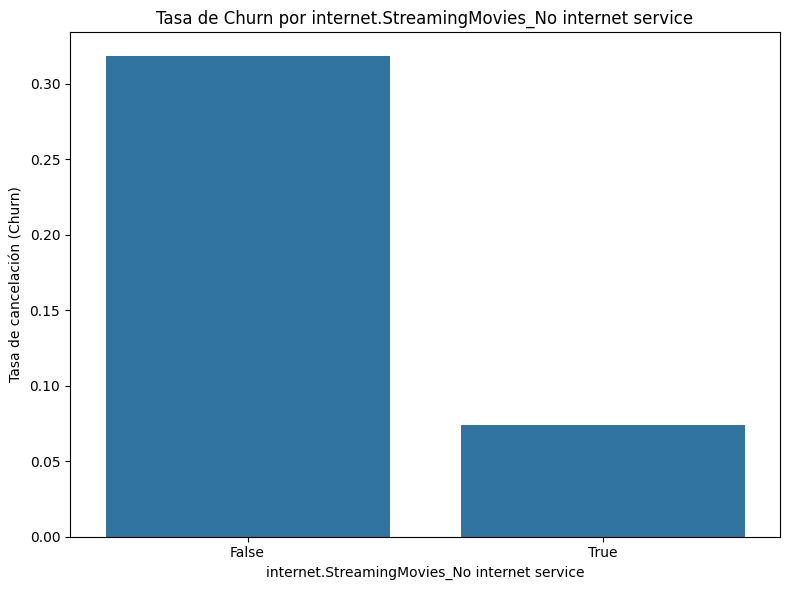

In [570]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

n = df_encoded.shape[0]  # Número total de data points
k = round(1 + (10/3) * np.log10(n))  # Sturges' Rule for number of bins

# Iterate over the top correlated columns
for col in correlaciones_ordenadas.head(10).index:
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot

    if df_encoded[col].dtype == 'bool':
        # Handle boolean columns directly
        churn_rates = df_encoded.groupby(col, observed=False)["Churn"].mean().reset_index()
        # Convert boolean values to strings for plotting
        churn_rates[col] = churn_rates[col].astype(str)
        sns.barplot(data=churn_rates, x=col, y="Churn")
        plt.title(f"Tasa de Churn por {col}")
        plt.ylabel("Tasa de cancelación (Churn)")
        plt.xlabel(col)
        plt.xticks(rotation=0)  # No rotation needed for boolean
    else:
        # Handle numerical columns with binning
        # Use pd.cut directly within groupby
        churn_rates = df_encoded.groupby(pd.cut(df_encoded[col], bins=k, include_lowest=True), observed=False)["Churn"].mean().reset_index()
        # Rename the column created by groupby(pd.cut(...))
        churn_rates.columns = [col, "Churn"]
        sns.barplot(data=churn_rates, x=col, y="Churn")
        plt.title(f"Tasa de Churn por grupo de {col}")
        plt.ylabel("Tasa de cancelación (Churn)")
        plt.xlabel(col)
        plt.xticks(rotation=45, ha='right')  # Rotate labels for numerical bins

    plt.tight_layout()
    plt.show()

In [546]:
churn_rates

,tenure_group,Churn
0,"(-0.073, 5.143]",0.542670
1,"(5.143, 10.286]",0.373957
2,"(10.286, 15.429]",0.336000
3,"(15.429, 20.571]",0.281863
4,"(20.571, 25.714]",0.250608
5,"(25.714, 30.857]",0.201705
6,"(30.857, 36.0]",0.214464
7,"(36.0, 41.143]",0.219745
8,"(41.143, 46.286]",0.167722
9,"(46.286, 51.429]",0.167665


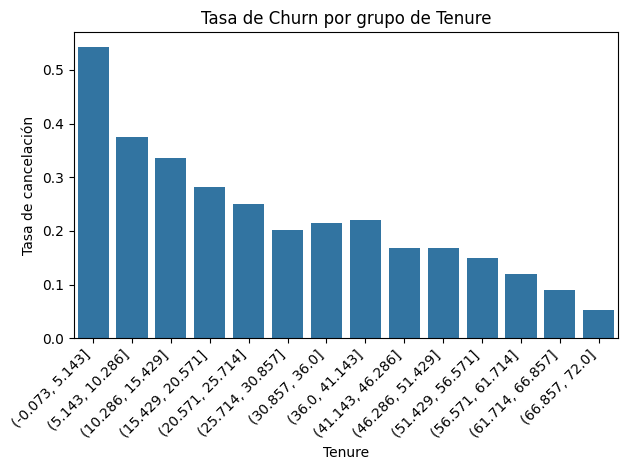

In [542]:
# Gráfico automatizado
sns.barplot(data=churn_rates, x="tenure_group", y="Churn")
plt.title("Tasa de Churn por grupo de Tenure")
plt.ylabel("Tasa de cancelación")
plt.xlabel('Tenure')
plt.xticks(rotation=45, ha='right') # Rotate labels
plt.tight_layout()
plt.show()

/tmp/ipython-input-4205592051.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_encoded.groupby("tenure_group")["Churn"].mean().reset_index()


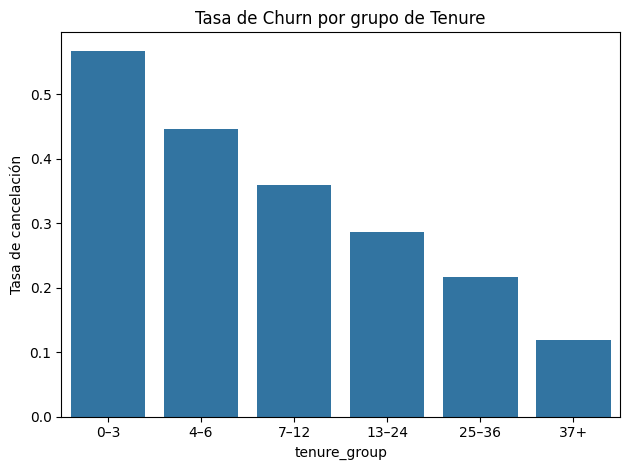

In [537]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
#df = pd.read_csv("clientes.csv")

# Binning de tenure
df_encoded["tenure_group"] = pd.cut(df["customer.tenure"], bins=[0, 3, 6, 12, 24, 36, np.inf],
                            labels=["0–3", "4–6", "7–12", "13–24", "25–36", "37+"])

# Tasa de churn por grupo
churn_rates = df_encoded.groupby("tenure_group")["Churn"].mean().reset_index()

# Gráfico automatizado
sns.barplot(data=churn_rates, x="tenure_group", y="Churn")
plt.title("Tasa de Churn por grupo de Tenure")
plt.ylabel("Tasa de cancelación")
plt.tight_layout()
plt.savefig("churn_tenure_plot.png")

In [535]:
churn_rates

,tenure_group,Churn
0,0–3,0.568030
1,4–6,0.446301
2,7–12,0.358865
3,13–24,0.287109
4,25–36,0.216346
5,37+,0.119294


In [472]:
df_numericas = df.select_dtypes(include='number')
df_numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer.tenure          7043 non-null   int64  
 1   account.Charges.Monthly  7043 non-null   float64
 2   account.Charges.Total    7043 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 165.2 KB


In [473]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Churn                                          7043 non-null   int64   
 1   customer.tenure                                7043 non-null   int64   
 2   account.Charges.Monthly                        7043 non-null   float64 
 3   account.Charges.Total                          7043 non-null   float64 
 4   customer.gender_Male                           7043 non-null   bool    
 5   customer.Partner_Yes                           7043 non-null   bool    
 6   customer.Dependents_Yes                        7043 non-null   bool    
 7   phone.PhoneService_Yes                         7043 non-null   bool    
 8   phone.MultipleLines_No phone service           7043 non-null   bool    
 9   phone.MultipleLines_Yes                  

In [474]:
Cualitativa

['Churn',
 'customer.gender',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'customer.SeniorCitizen']

In [475]:
df_prueba=df
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.Partner           7043 non-null   object 
 3   customer.Dependents        7043 non-null   object 
 4   customer.tenure            7043 non-null   int64  
 5   phone.PhoneService         7043 non-null   object 
 6   phone.MultipleLines        7043 non-null   object 
 7   internet.InternetService   7043 non-null   object 
 8   internet.OnlineSecurity    7043 non-null   object 
 9   internet.OnlineBackup      7043 non-null   object 
 10  internet.DeviceProtection  7043 non-null   object 
 11  internet.TechSupport       7043 non-null   object 
 12  internet.StreamingTV       7043 non-null   object 
 13  internet.StreamingMovies   7043 non-null   objec

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.Partner           7043 non-null   object 
 3   customer.Dependents        7043 non-null   object 
 4   customer.tenure            7043 non-null   int64  
 5   phone.PhoneService         7043 non-null   object 
 6   phone.MultipleLines        7043 non-null   object 
 7   internet.InternetService   7043 non-null   object 
 8   internet.OnlineSecurity    7043 non-null   object 
 9   internet.OnlineBackup      7043 non-null   object 
 10  internet.DeviceProtection  7043 non-null   object 
 11  internet.TechSupport       7043 non-null   object 
 12  internet.StreamingTV       7043 non-null   object 
 13  internet.StreamingMovies   7043 non-null   objec

In [477]:
df_=df_prueba['customer.gender']
df_encoded = pd.get_dummies(df_genero, columns='customer.gender')


In [478]:
df['customer.gender'].value_counts()

,count
customer.gender,
Male,3555
Female,3488


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.Partner           7043 non-null   object 
 3   customer.Dependents        7043 non-null   object 
 4   customer.tenure            7043 non-null   int64  
 5   phone.PhoneService         7043 non-null   object 
 6   phone.MultipleLines        7043 non-null   object 
 7   internet.InternetService   7043 non-null   object 
 8   internet.OnlineSecurity    7043 non-null   object 
 9   internet.OnlineBackup      7043 non-null   object 
 10  internet.DeviceProtection  7043 non-null   object 
 11  internet.TechSupport       7043 non-null   object 
 12  internet.StreamingTV       7043 non-null   object 
 13  internet.StreamingMovies   7043 non-null   objec

In [480]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Female  7043 non-null   bool 
 1   Male    7043 non-null   bool 
dtypes: bool(2)
memory usage: 13.9 KB


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.Partner           7043 non-null   object 
 3   customer.Dependents        7043 non-null   object 
 4   customer.tenure            7043 non-null   int64  
 5   phone.PhoneService         7043 non-null   object 
 6   phone.MultipleLines        7043 non-null   object 
 7   internet.InternetService   7043 non-null   object 
 8   internet.OnlineSecurity    7043 non-null   object 
 9   internet.OnlineBackup      7043 non-null   object 
 10  internet.DeviceProtection  7043 non-null   object 
 11  internet.TechSupport       7043 non-null   object 
 12  internet.StreamingTV       7043 non-null   object 
 13  internet.StreamingMovies   7043 non-null   objec

In [482]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'customer.SeniorCitizen'],
      dtype='object')

In [483]:
exclude_columns = ['customerID', 'Churn']
columns_to_encode = [col for col in categorical_columns if col not in exclude_columns]


In [484]:
columns_to_encode

['customer.gender',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'customer.SeniorCitizen']

In [485]:
Cualitativa

['Churn',
 'customer.gender',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'customer.SeniorCitizen']

In [486]:
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)


In [487]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   object 
 1   customer.tenure                                7043 non-null   int64  
 2   account.Charges.Monthly                        7043 non-null   float64
 3   account.Charges.Total                          7043 non-null   float64
 4   customer.gender_Male                           7043 non-null   bool   
 5   customer.Partner_Yes                           7043 non-null   bool   
 6   customer.Dependents_Yes                        7043 non-null   bool   
 7   phone.PhoneService_Yes                         7043 non-null   bool   
 8   phone.MultipleLines_No phone service           7043 non-null   bool   
 9   phone.MultipleLines_Yes                        7043 

#### Otro metodo

In [488]:
import math
import numpy as np
import string

n=df.shape[0]                  # Número total de datos individuales
k=round(1+(10/3)*np.log10(n))  # Regla de Sturges

cuantitativa_dict = {}
for col in Cuantitativa:

  min=df[col].min()
  max=df[col].max()
  rango= max-min
  amplitud = math.ceil(rango / k)  # Redondeamos para cubrir el máximo
  labels = list(string.ascii_uppercase)
  print(f'Observaciones: {n}, Mínimo: {min}, Máximo: {max}, Amplitud: {amplitud}, Clases: {k}')
  inicio=min
  intervalos=[]
  etiquetas=[]
  intervalos.append(min)
  for i in range(k):
    fin = inicio + amplitud - 1  # Ajuste para cerrar el intervalo correctamente
    cuantitativa_dict[col] = fin
    print(labels[i], inicio,fin,i)
    inicio = fin + 1
    intervalos.append(fin)
    etiquetas.append(labels[i])
  cuantitativa_dict[col] = (intervalos,etiquetas[::-1])

Observaciones: 7043, Mínimo: 0, Máximo: 72, Amplitud: 6, Clases: 14
A 0 5 0
B 6 11 1
C 12 17 2
D 18 23 3
E 24 29 4
F 30 35 5
G 36 41 6
H 42 47 7
I 48 53 8
J 54 59 9
K 60 65 10
L 66 71 11
M 72 77 12
N 78 83 13
Observaciones: 7043, Mínimo: 18.25, Máximo: 118.75, Amplitud: 8, Clases: 14
A 18.25 25.25 0
B 26.25 33.25 1
C 34.25 41.25 2
D 42.25 49.25 3
E 50.25 57.25 4
F 58.25 65.25 5
G 66.25 73.25 6
H 74.25 81.25 7
I 82.25 89.25 8
J 90.25 97.25 9
K 98.25 105.25 10
L 106.25 113.25 11
M 114.25 121.25 12
N 122.25 129.25 13
Observaciones: 7043, Mínimo: 0.0, Máximo: 8684.8, Amplitud: 621, Clases: 14
A 0.0 620.0 0
B 621.0 1241.0 1
C 1242.0 1862.0 2
D 1863.0 2483.0 3
E 2484.0 3104.0 4
F 3105.0 3725.0 5
G 3726.0 4346.0 6
H 4347.0 4967.0 7
I 4968.0 5588.0 8
J 5589.0 6209.0 9
K 6210.0 6830.0 10
L 6831.0 7451.0 11
M 7452.0 8072.0 12
N 8073.0 8693.0 13


In [489]:
cuantitativa_dict


{'customer.tenure': ([0,
   5,
   11,
   17,
   23,
   29,
   35,
   41,
   47,
   53,
   59,
   65,
   71,
   77,
   83],
  ['N', 'M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']),
 'account.Charges.Monthly': ([18.25,
   25.25,
   33.25,
   41.25,
   49.25,
   57.25,
   65.25,
   73.25,
   81.25,
   89.25,
   97.25,
   105.25,
   113.25,
   121.25,
   129.25],
  ['N', 'M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']),
 'account.Charges.Total': ([0.0,
   620.0,
   1241.0,
   1862.0,
   2483.0,
   3104.0,
   3725.0,
   4346.0,
   4967.0,
   5588.0,
   6209.0,
   6830.0,
   7451.0,
   8072.0,
   8693.0],
  ['N', 'M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'])}

In [490]:
dis_frec_cuantitativa_dict={}
for col in Cuantitativa:
  frec = pd.value_counts(pd.cut(x=df[col],
                                       bins=cuantitativa_dict[col][0],
                                       labels=cuantitativa_dict[col][1],
                                       include_lowest=True))
  porc = pd.value_counts(pd.cut(x=df[col],
                                       bins=cuantitativa_dict[col][0],
                                       labels=cuantitativa_dict[col][1],
                                       include_lowest=True),normalize=True).round(4) * 100
  dis_frec_cuantitativa_dict[col] = pd.DataFrame({
        'Frecuencia': frec,
        'Porcentaje %': porc
    })

/tmp/ipython-input-11027079.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frec = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-11027079.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porc = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-11027079.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frec = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-11027079.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porc = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-11027079.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() in

In [491]:
dis_frec_cuantitativa_dict['customer.tenure'].sort_index(ascending=False)

,Frecuencia,Porcentaje %
customer.tenure,,
A,0,0.00
B,362,5.14
C,671,9.53
D,450,6.39
E,404,5.74
F,416,5.91
G,384,5.45
H,364,5.17
I,423,6.01


AttributeError: 'FacetGrid' object has no attribute 'set_xlabel'

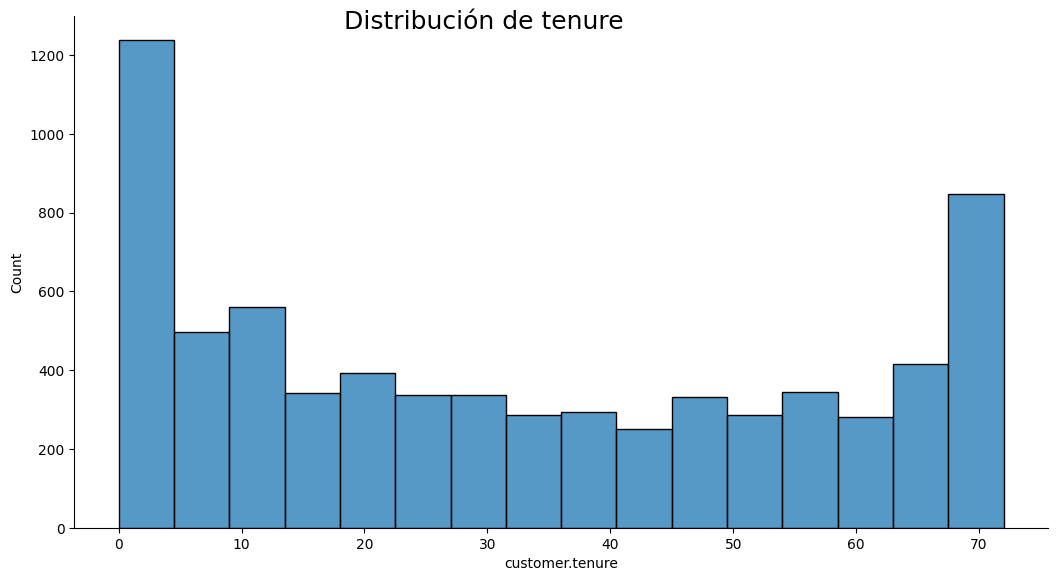

In [492]:
ax = sns.displot(data=df, x='customer.tenure', kde=False)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Distribución de tenure', fontsize=18)
ax.set_xlabel('Tenure', fontsize=14)

In [ ]:
import pandas as pd

# Carga del CSV desde GitHub
url = 'https://raw.githubusercontent.com/Tecindes/ChallengeONE__/refs/heads/main/reporte.csv'
df = pd.read_csv(url)

# Vista general y revisión de nulos
print(df.info())
print(df.isnull().sum())

In [ ]:
df.describe().to_markdown("resumen_datos.md")

In [ ]:
# One-Hot Encoding (ideal si no hay demasiadas categorías)
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
df_encoded